In [3]:
%%capture
%load_ext autoreload
%autoreload 2
from setup_nb_env import *


In [158]:
df = pd.read_csv('../results/20230926_propcorrs_10props_2000n_x5.csv')
df = df.sort_values(by=['Endpoint','Method'])
df = df[~df.Endpoint.isin(['QED','MolMR','Aliphatic\nRings'])]

(-0.5, 29.5)

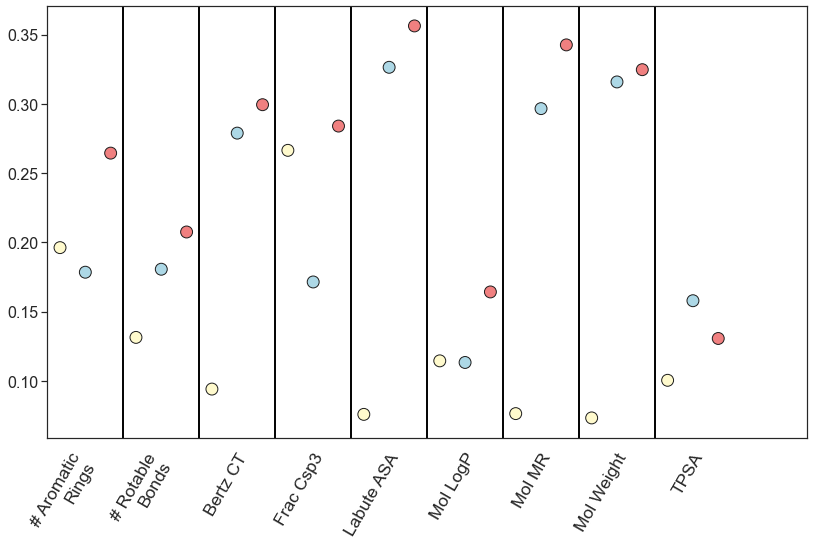

In [159]:
base_colors = ['lemonchiffon', 'lightblue','lightcoral']
# base_colors = ['lightgreen', 'lightblue','lightcoral']

all_colors = base_colors * (len(df["Mean"]) // len(base_colors))

plt.figure(figsize = (14,8), dpi=70)
# plt.bar(range(len(df["Mean"])), df["Mean"], color = all_colors, width=0.5, alpha=0.5, edgecolor='k') #, s=100, edgecolors='k')
plt.scatter(range(len(df["Mean"])), df["Mean"], c = all_colors, s=150, edgecolors='k')

vlines = list(range(0,len(df), 3))

for vline in vlines:
    plt.axvline(vline - 0.5, color='black',linewidth=2)

#plt.xticks(range(len(df["Endpoint"])), df["Method"], rotation = 90)
#plt.xticks(range(len(endpoint_labels)), endpoint_labels, rotation = 90)
#plt.xticks(None)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

endpoint_labels = []
used_labels = set()
for x in df["Endpoint"]:
    if x not in used_labels:
        endpoint_labels.append(x)
        used_labels.add(x)
    else:
        endpoint_labels.append("")
        
for i, label in enumerate(endpoint_labels):
    plt.text(i + 1.5, 0.05, label, rotation = 60, ha='right', va = "top")
    
plt.xlim(-0.5, 29.5)

In [21]:
df = pd.read_csv('../results/20230926_propcorrs_10props_2000n_x5.csv')
df = df.sort_values(by=['Endpoint','Method'])
df = df[~df.Endpoint.isin([
#                             'Mol MR',
                           'Aliphatic\nRings',
                           'TPSA',
                           'Bertz CT',
                           ])]

df = df.replace({'# Aromatic\nRings':'Num. Aromatic\nRings', 
                 '# Rotable\nBonds':'Num. Rotable\nBonds', 'Frac Csp3':'Frac. Csp3',
                 'ECFP4 (normed)':'Morgan fingerprints',
                 'Naive encoder':'Naive autoencoder'})
df.head()

,Unnamed: 0,Endpoint,Method,Mean,Std,All
28,28,Num. Aromatic\nRings,Morgan fingerprints,0.196200,0.004095,"[0.20123689603836892, 0.2000835235343618, 0.19171855892164055, 0.1913851555607382, 0.19657684860897434]"
29,29,Num. Aromatic\nRings,Naive autoencoder,0.178451,0.002710,"[0.179824834301364, 0.18257963111447315, 0.17834037326397195, 0.17448608177931155, 0.17702225009700873]"
27,27,Num. Aromatic\nRings,SALSA,0.264425,0.010095,"[0.283883194289209, 0.2568504856193556, 0.2593115526755826, 0.257544367009171, 0.2645375491293029]"
22,22,Num. Rotable\nBonds,Morgan fingerprints,0.131396,0.014479,"[0.11355579792043616, 0.13546090224959303, 0.1544001960839191, 0.11836852794011939, 0.13519494971248305]"
23,23,Num. Rotable\nBonds,Naive autoencoder,0.180608,0.007742,"[0.16748300777989963, 0.18335993141539386, 0.18484601358657987, 0.17723201775012076, 0.19012052075866545]"


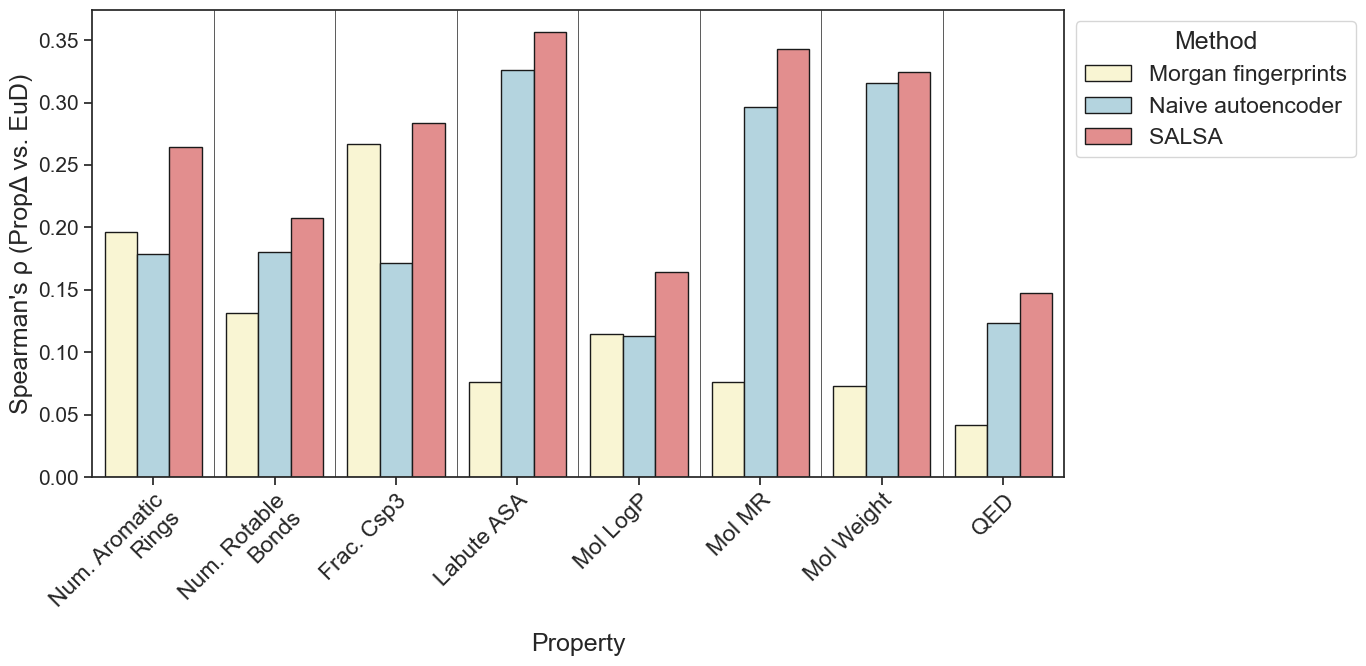

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='ticks',font_scale=1.5) 

pal = ['#fffb8c', 'lightblue','lightcoral']
pal = ['lemonchiffon', 'lightblue','lightcoral']

plt.figure(figsize=(14,7))
ax = sns.barplot(data=df, x='Endpoint',y='Mean',hue='Method',palette=pal, edgecolor='k')

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=4, title=None, frameon=True)

for x in [0.5,1.5,2.5,3.5,4.5,5.5,6.5,]: #7.5,8.5]:
    ax.axvline(x, color = 'k', linestyle='-',linewidth=0.5) 
plt.xticks(rotation=45,ha='right',rotation_mode='anchor')
plt.ylabel("Spearman's ρ (PropΔ vs. EuD)")
plt.xlabel("Property")
plt.yticks(fontsize=15)
plt.tight_layout()